In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
# Load Dataset
df = pd.read_csv('data/cleaned_salaries.csv')

####  Overall distribution of salaries across work years and experience levels

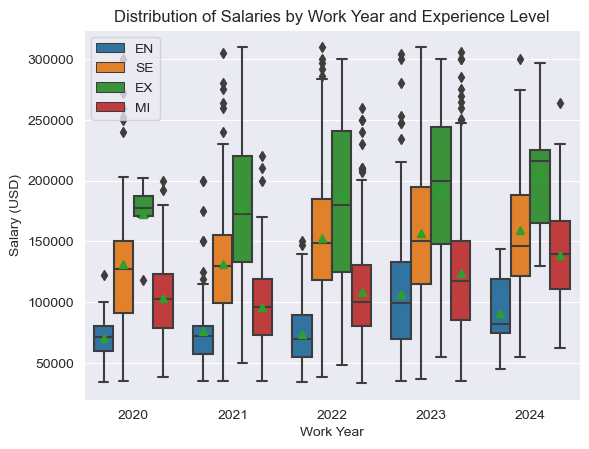

In [4]:
# Group the data by work_year and experience_level
grouped_data = df.groupby(["work_year", "experience_level"])["salary"]

# Create a boxplot using seaborn
sns.boxplot(
    x="work_year",
    y="salary",
    hue="experience_level",
    showmeans=True,
    data=df,
)

# Customize the plot
plt.xlabel("Work Year")
plt.ylabel("Salary (USD)")
plt.title("Distribution of Salaries by Work Year and Experience Level")
plt.legend()

# Show the plot
plt.show()

#### The average salary change for different employment types

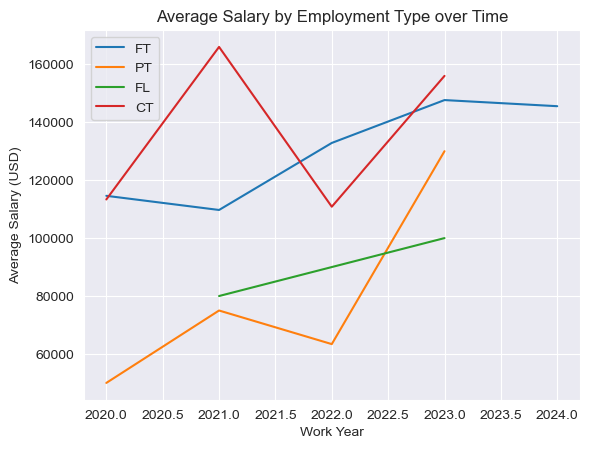

In [5]:
# Group by work_year and employment_type
grouped_data = df.groupby(["work_year", "employment_type"])["salary"]
# Calculate average salary by group
average_salary = grouped_data.mean()

# Reset multi-index for easier plotting
average_salary = average_salary.reset_index()
# Create Line Plot for each employment type
for employment_type in df["employment_type"].unique():
    filtered_data = average_salary[average_salary["employment_type"] == employment_type]
    plt.plot(filtered_data["work_year"], filtered_data["salary"], label=employment_type)

# Label and Display Plot
plt.xlabel("Work Year")
plt.ylabel("Average Salary (USD)")
plt.title("Average Salary by Employment Type over Time")
plt.legend()
plt.show()

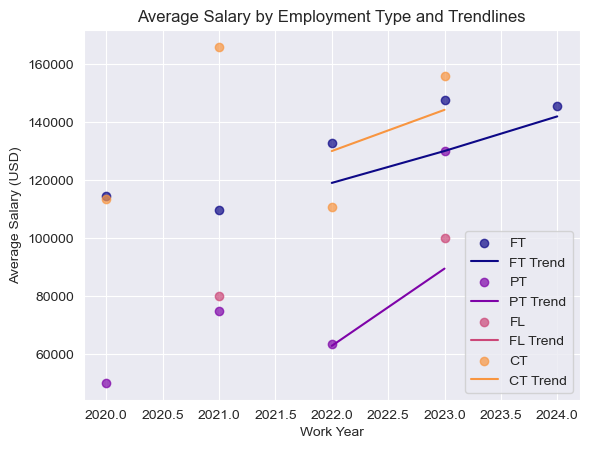

In [6]:
# Plot Scatter points with regression lines
for i, employment_type in enumerate(df["employment_type"].unique()):
    filtered_data = average_salary[average_salary["employment_type"] == employment_type]
    plt.scatter(
        filtered_data["work_year"],
        filtered_data["salary"],
        label=employment_type,
        color=plt.cm.plasma(i / len(df["employment_type"].unique())),
        alpha=0.7,
    )
    plt.plot(
        filtered_data["work_year"],
        filtered_data["salary"].rolling(window=3).mean(),
        color=plt.cm.plasma(i / len(df["employment_type"].unique())),
        label=f"{employment_type} Trend",
    )

# Label and Display Plot
plt.xlabel("Work Year")
plt.ylabel("Average Salary (USD)")
plt.title("Average Salary by Employment Type and Trendlines")
plt.legend()
plt.show()

#### The salary distribution of top 10 job titles

                                   count           mean           std  \
job_title                                                               
Application Security Analyst         6.0   85916.666667  85589.962418   
Application Security Architect       1.0  117000.000000           NaN   
Application Security Engineer       25.0  108480.000000  56800.909617   
Application Security Specialist      1.0   85000.000000           NaN   
Azure Security Engineer              3.0   58800.000000   2078.460969   
...                                  ...            ...           ...   
Vulnerability Analyst                9.0  124233.333333  43216.518833   
Vulnerability Management Analyst     2.0  100250.000000  45042.701962   
Vulnerability Management Engineer   14.0  147835.714286  48148.322235   
Vulnerability Researcher            10.0  119310.000000  56510.735460   
Zero Trust Architect                 4.0  151050.000000  68070.771995   

                                        min       

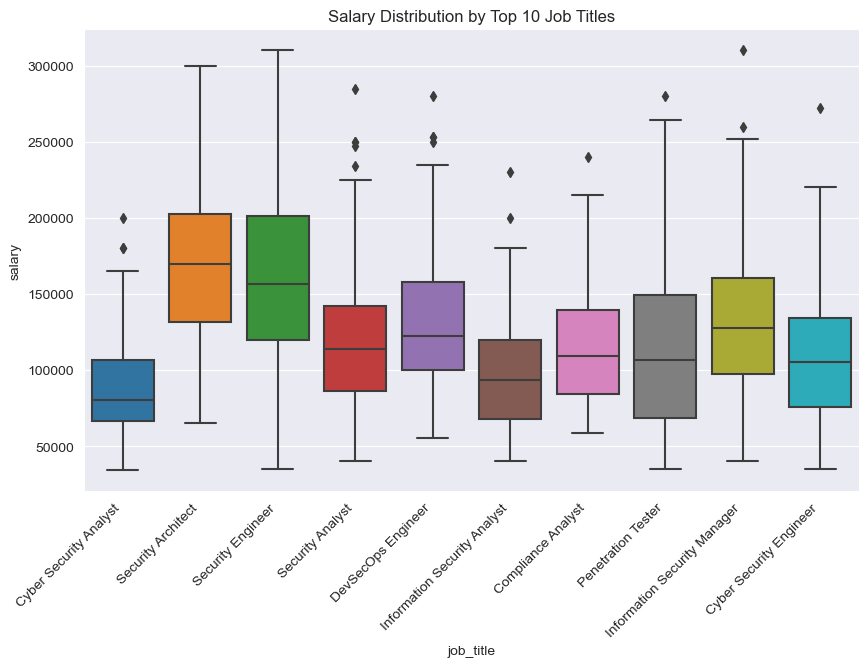

ANOVA F-statistic: 7.36, p-value: 0.0000
               count           mean           std      min       25%  \
company_size                                                           
L              960.0  125194.234375  59153.994730  34000.0   80000.0   
M             2425.0  144752.836701  57486.480929  35000.0  100000.0   
S              114.0   91485.535088  51426.781209  33500.0   52750.0   

                   50%       75%       max  
company_size                                
L             117000.0  153137.5  310000.0  
M             139000.0  180000.0  310000.0  
S              75000.0  115750.0  300000.0  


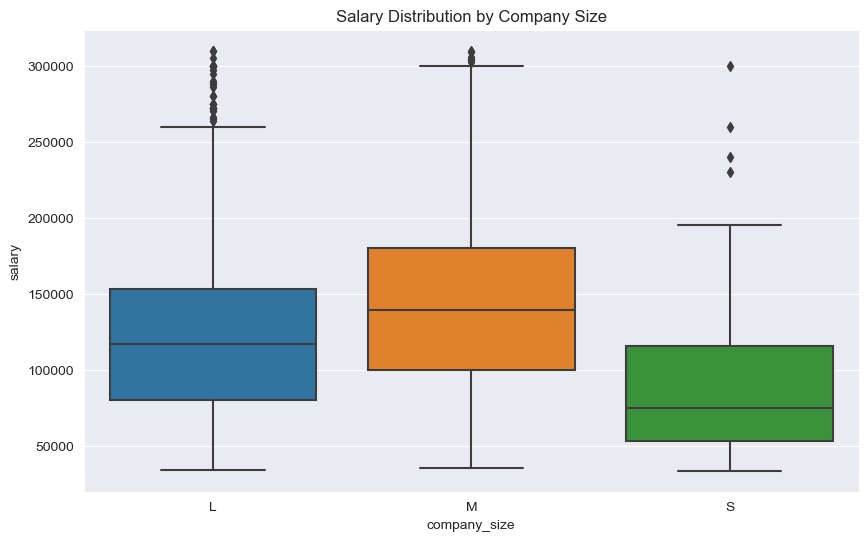

ANOVA F-statistic: 77.06, p-value: 0.0000


In [9]:
# Analyze salary differences by job title
grouped_by_job_title = df.groupby("job_title")["salary"]

# Calculate summary statistics
job_title_stats = grouped_by_job_title.describe()
print(job_title_stats)

# Get the top 10 job titles
top_10_job_titles = job_title_stats.sort_values(by='count', ascending=False).head(10).index

# Filter the dataframe to include only the top 10 job titles
df_top_10_job_titles = df[df['job_title'].isin(top_10_job_titles)]

# Visualize salary distributions (Option 1: Rotate labels)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_top_10_job_titles, x="job_title", y="salary")
plt.xticks(rotation=45, ha="right")  # Rotate labels
plt.title("Salary Distribution by Top 10 Job Titles")
plt.show()

# Perform ANOVA test for statistical significance
f_statistic, p_value = stats.f_oneway(*grouped_by_job_title.apply(list))
print(f"ANOVA F-statistic: {f_statistic:.2f}, p-value: {p_value:.4f}")

# Analyze salary differences by company size
grouped_by_company_size = df.groupby("company_size")["salary"]

# Calculate summary statistics
company_size_stats = grouped_by_company_size.describe()
print(company_size_stats)

# Visualize salary distributions (Option 2: Adjust tick positions)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="company_size", y="salary")
plt.title("Salary Distribution by Company Size")
plt.show()

# Perform ANOVA test for statistical significance
f_statistic, p_value = stats.f_oneway(*grouped_by_company_size.apply(list))
print(f"ANOVA F-statistic: {f_statistic:.2f}, p-value: {p_value:.4f}")

#### The salary distribution of top 10 employee residence

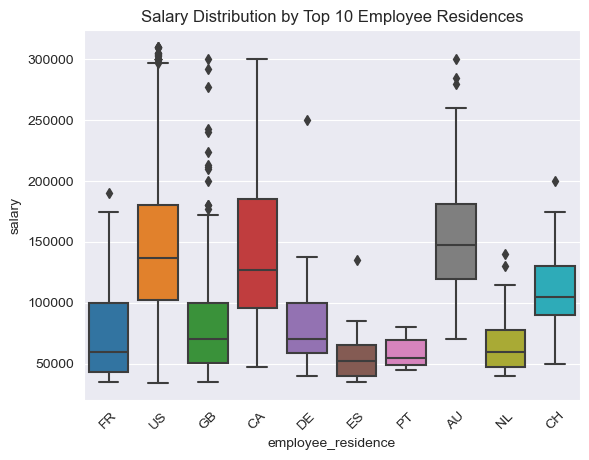

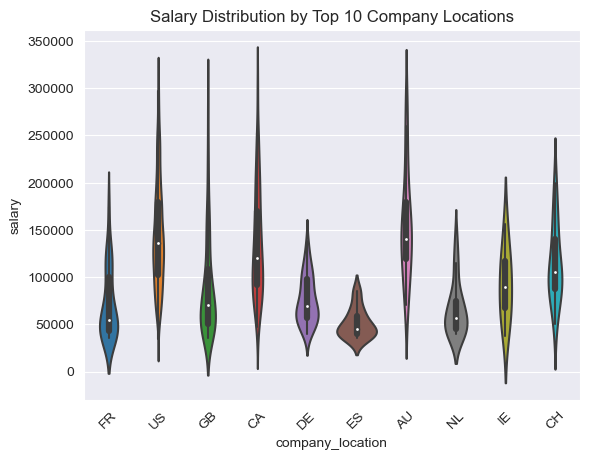

In [11]:
# Analyze salary variations by employee residence
grouped_by_residence = df.groupby("employee_residence")["salary"]

# Get the top 10 employee residence categories
top_10_residences = grouped_by_residence.count().nlargest(10).index

# Filter the dataframe to include only the top 10 employee residence categories
df_top_10_residences = df[df['employee_residence'].isin(top_10_residences)]

# Create a boxplot to visualize salary distribution for the top 10 employee residence categories
plt.figure()
sns.boxplot(data=df_top_10_residences, x="employee_residence", y="salary")
plt.title("Salary Distribution by Top 10 Employee Residences")
plt.xticks(rotation=45)
plt.show()

# Analyze salary variations by company location
grouped_by_company_location = df.groupby("company_location")["salary"]

# Get the top 10 company location categories
top_10_locations = grouped_by_company_location.count().nlargest(10).index

# Filter the dataframe to include only the top 10 company location categories
df_top_10_locations = df[df['company_location'].isin(top_10_locations)]

# Create a violin plot for a different perspective on salary distribution for the top 10 company location categories
plt.figure()
sns.violinplot(data=df_top_10_locations, x="company_location", y="salary")
plt.title("Salary Distribution by Top 10 Company Locations")
plt.xticks(rotation=45)
plt.show()